# Monocular Depth Estimation with DenseDepth

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/drive/1A2DYu05Bc166FX4p4ANBRMA0eGSxuZ2j"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/ialhashim/DenseDepth"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>

</table>

This notebook a demonstration of the pretrained model for monocular depth estimation from the paper "**High Quality Monocular Depth Estimation via Transfer Learning**" (https://arxiv.org/abs/1812.11941).

Simply click "Runtime > Run all", then choose files to upload.

<img src="https://camo.githubusercontent.com/06bd5d7df1f2bfea3ee8f507c790705d9cc60e35/68747470733a2f2f73332d65752d776573742d312e616d617a6f6e6177732e636f6d2f64656e736564657074682f64656e736564657074685f726573756c74735f30322e6a7067">

# Helper functions

In [0]:
%tensorflow_version 1.x
import warnings
warnings.filterwarnings('ignore')

In [0]:
def upload_files():
  from google.colab import files
  uploaded = files.upload()
  for k, v in uploaded.items():
    open(k, 'wb').write(v)
  return list(uploaded.keys())

def preprocess_img(img_path):
  """
  The input image(s) is opened using PIL, the A-channel is removed (if it exists), 
  and the pixel values are normalized into the range 0-1.

  INPUT:
    a list of image path(s).

  OUTPUT:
    a numpy array of the stacked images.
  """
  import numpy as np
  from PIL import Image

  loaded_images = []
  for file1 in img_path:
    img = Image.open(file1).resize((640, 480))
    img = np.asarray(img, dtype=float)[:, :, 0:3]
    x = np.clip(img / 255, 0, 1)
    loaded_images.append(x)
  inputs = np.stack(loaded_images, axis=0)

  print('\nLoaded ({0}) images of size {1}.'.format(inputs.shape[0], inputs.shape[1:]))

  return inputs

def get_model(model_path='nyu.h5'):
  # Download the repo
  print("Downloading repository...\n\n")
  !git clone https://github.com/ialhashim/DenseDepth.git 
  !cd "/content/DenseDepth/" && mv * "/content/"

  print("Downloading weights...\n\n")
  # Download the model
  !wget https://s3-eu-west-1.amazonaws.com/densedepth/nyu.h5 -O ./nyu.h5

  from keras.models import load_model
  from layers import BilinearUpSampling2D
  from matplotlib import pyplot as plt

  custom_objects = {'BilinearUpSampling2D': BilinearUpSampling2D, 'depth_loss_function': None}

  print('Loading model...\n\n')

  model = load_model(model_path, custom_objects=custom_objects, compile=False)

  print("Model loaded.\n\n")

  return model

def display_depth(inputs, outputs):
  from utils import predict, load_images, display_images
  from matplotlib import pyplot as plt

  viz = display_images(outputs.copy(), inputs.copy())
  plt.figure(figsize=(20,10))
  plt.imshow(viz)
  plt.xticks([])
  plt.yticks([])
  plt.savefig('test.png')
  plt.show()

def run_inference(file_paths):
  import os
  import numpy as np

  os.environ['TF_CPP_MIN_LOG_LEVEL'] = '5'
  np.warnings.filterwarnings('ignore')

  model = get_model('nyu.h5')

  inputs = preprocess_img(file_paths)

  from utils import predict

  print("Running inference...\n\n")

  outputs = predict(model, inputs)

  print("Inference completed.\n\n")
  
  display_depth(inputs, outputs)

# Upload your images

In [0]:
file_paths = upload_files()

Saving 3.png to 3 (1).png
Saving 1.jpg to 1.jpg


# Load model and run inference



Cloning into 'DenseDepth'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 225 (delta 0), reused 2 (delta 0), pack-reused 222
Receiving objects: 100% (225/225), 11.80 MiB | 5.89 MiB/s, done.
Resolving deltas: 100% (106/106), done.


--2020-04-01 07:19:41--  https://s3-eu-west-1.amazonaws.com/densedepth/nyu.h5
Resolving s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)... 52.218.101.131
Connecting to s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)|52.218.101.131|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 172897376 (165M) [application/h5]
Saving to: ‘./nyu.h5’

./nyu.h5            100%[===================>] 164.89M  11.7MB/s    in 16s     

2020-04-01 07:19:58 (10.3 MB/s) - ‘./nyu.h5’ saved [172897376/172897376]



Using TensorFlow backend.


Loading model...
















Model loaded.



Loaded (2) images of size (480, 640, 3).


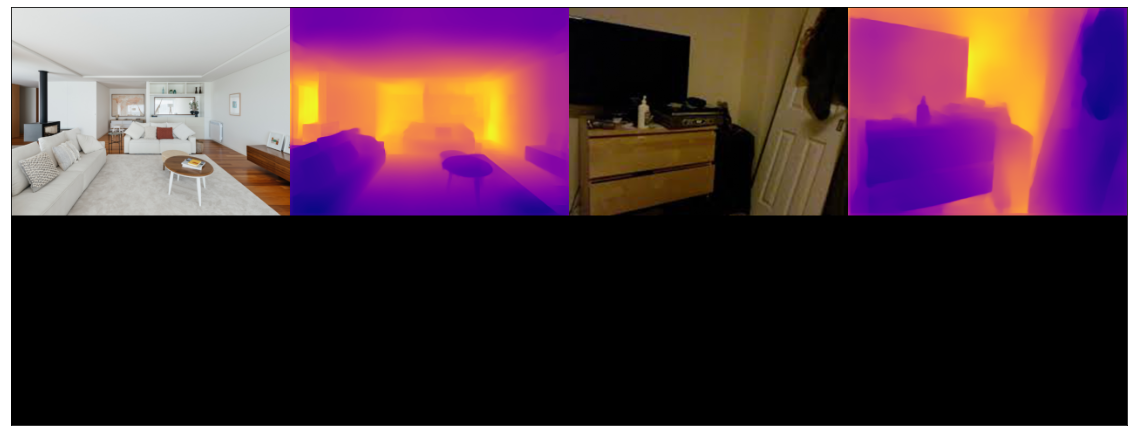

In [0]:
run_inference(file_paths)